# 6.15小波包测试程序

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import keras
import pywt    #小波包
from pandas import read_csv
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passi

In [2]:
print(os.getcwd())

E:\Research Project\DKASC, Alice Springs


In [3]:
os.listdir(os.getcwd())

['.idea',
 '.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_Springs_2016-2020',
 'Dataset',
 'logs',
 'picture',
 'Predict',
 'Program backups',
 'temp',
 'venv',
 '数据集_小波包分解重构数据.ipynb',
 '数据集_预处理_第二版0702.ipynb',
 '测试小波分解.ipynb',
 '测试模型0622.ipynb',
 '测试模型0704.ipynb',
 '测试模型0704批量.ipynb',
 '测试模型小波包分解0704批量.ipynb',
 '画图.ipynb',
 '画图0704.ipynb',
 '笔记.ipynb',
 '训练模型0622.ipynb',
 '训练模型0702.ipynb',
 '训练模型0703 WPD.ipynb']

In [4]:
os.chdir('./Dataset/')
os.listdir()

['DKA.Station_1-9.csv',
 'NaN_DKA.Station.csv',
 'raw_DKA.Station_1-9.csv',
 'test',
 'test0702',
 'testdata.csv',
 'testWPD',
 'test_1A.csv',
 'train',
 'train0702',
 'traindata.csv',
 'trainWPD',
 'train_1A.csv',
 '测试集8个站点.csv',
 '训练集8个站点.csv']

In [5]:
tra=pd.read_csv('./test0702/test_Station_4.csv')

In [6]:
tra.head(5)

,Timestamp,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Station_4
0,2019/1/1 0:00,2019,1,1,0,0,30.020723,20.125513,32.213470,0.0,1.543787,1.349848,0.000533
1,2019/1/1 0:05,2019,1,1,0,5,29.958653,20.040049,32.158791,0.0,1.373370,1.244123,0.000433
2,2019/1/1 0:10,2019,1,1,0,10,29.884491,20.013313,32.155808,0.0,1.142953,0.992849,0.000867
3,2019/1/1 0:15,2019,1,1,0,15,29.831554,20.068233,32.178555,0.0,0.709036,0.611533,0.000767
4,2019/1/1 0:20,2019,1,1,0,20,29.750330,20.086567,32.166214,0.0,1.058623,0.814599,0.000533


In [7]:
# tra=tra.set_index('Month',False)
tra.head(5)

,Timestamp,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Station_4
0,2019/1/1 0:00,2019,1,1,0,0,30.020723,20.125513,32.213470,0.0,1.543787,1.349848,0.000533
1,2019/1/1 0:05,2019,1,1,0,5,29.958653,20.040049,32.158791,0.0,1.373370,1.244123,0.000433
2,2019/1/1 0:10,2019,1,1,0,10,29.884491,20.013313,32.155808,0.0,1.142953,0.992849,0.000867
3,2019/1/1 0:15,2019,1,1,0,15,29.831554,20.068233,32.178555,0.0,0.709036,0.611533,0.000767
4,2019/1/1 0:20,2019,1,1,0,20,29.750330,20.086567,32.166214,0.0,1.058623,0.814599,0.000533


In [8]:
tra.dtypes

Timestamp                              object
Year                                    int64
Month                                   int64
Day                                     int64
Hour                                    int64
Minutes                                 int64
Temperature(°C)                       float64
Relative Humidity(%)                  float64
Wind Direction(Degrees)               float64
Daily Rainfall(mm)                    float64
Global Horizontal Radiation(W/m²)     float64
Diffuse Horizontal Radiation(W/m²)    float64
Station_4                             float64
dtype: object

In [9]:
tra.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'Temperature(°C)', 'Relative Humidity(%)', 'Wind Direction(Degrees)',
       'Daily Rainfall(mm)', 'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Station_4'],
      dtype='object')

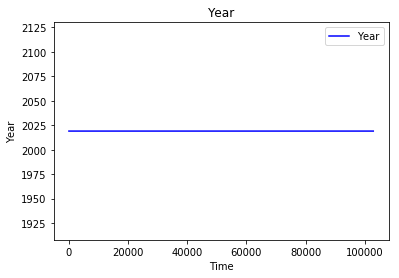

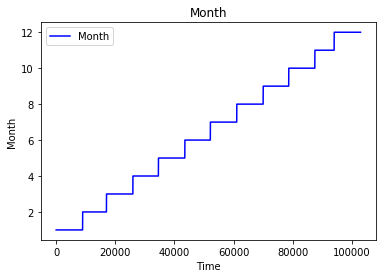

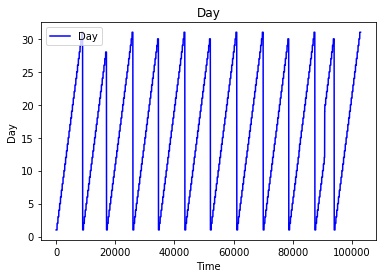

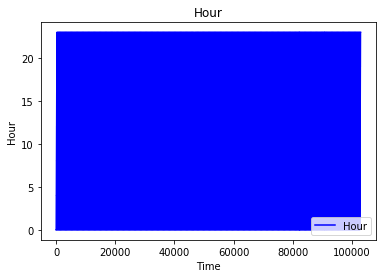

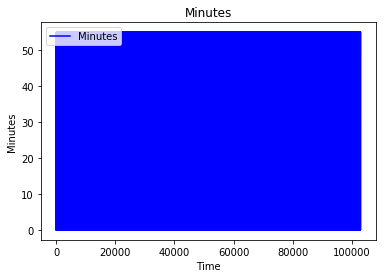

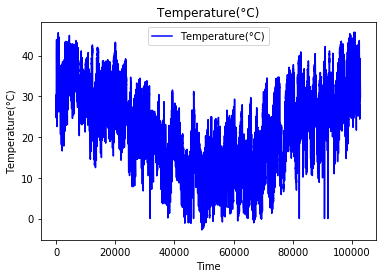

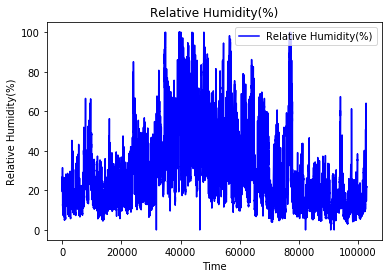

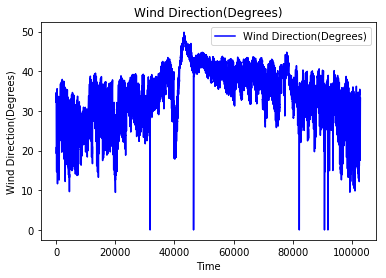

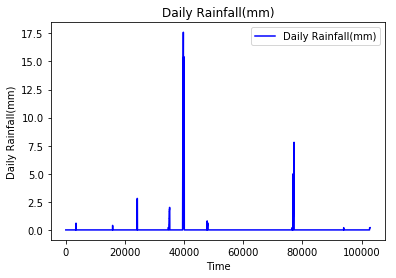

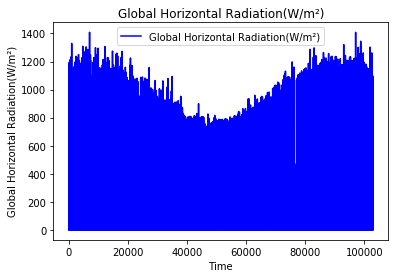

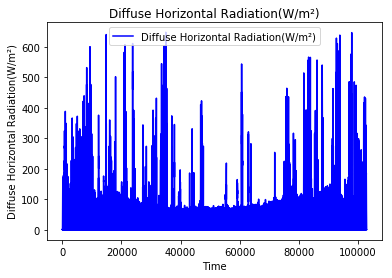

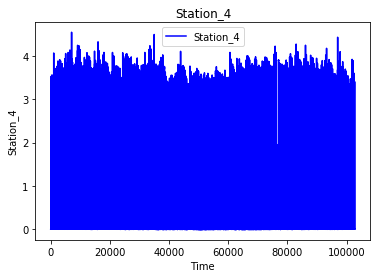

In [10]:
plotaa = list(tra.columns)
plotaa.remove('Timestamp')
for i in plotaa:
    plt.figure()
    plt.plot(tra[i],'b',label= i)
    plt.title(i)
    plt.ylabel(i)
    plt.xlabel('Time')
    plt.legend()

In [11]:
plotaa[len(plotaa)-1]

'Station_4'

In [12]:
data = tra[plotaa[len(plotaa)-1]].values

In [13]:
data

array([0.00053333, 0.00043333, 0.00086667, ..., 0.0004    , 0.00073333,
       0.00073333])

In [14]:
coeffs = pywt.wavedec(data, 'db3', level=3)

In [15]:
cA3, cD3, cD2 ,cD1 = coeffs

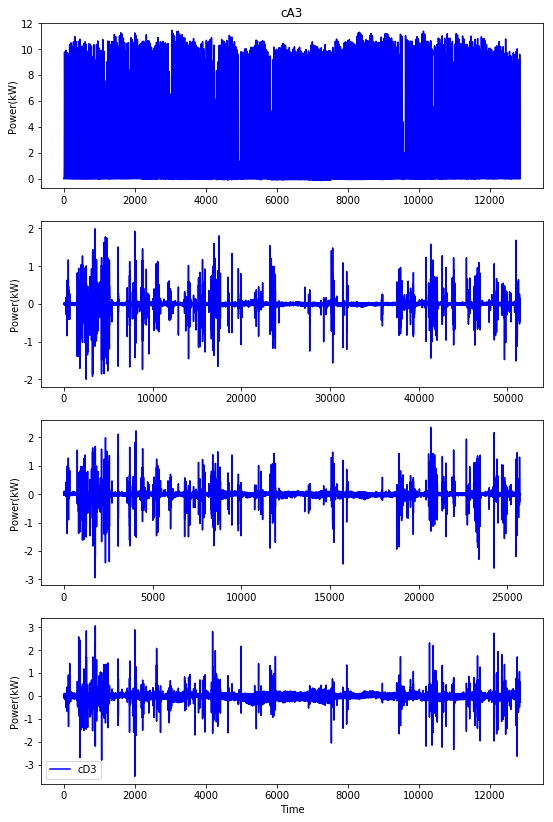

In [16]:
plt.figure(figsize=(9, 14))
plt.subplot(4,1,1)
# plt.xticks([1,3,6,9,12])
plt.plot(cA3,'b',label='cA3')
plt.title('cA3')
plt.ylabel('Power(kW)')
# plt.xlim((1, 12))

plt.subplot(4,1,2)
plt.plot(cD1,'b',label='cD1')
plt.title('')
plt.ylabel('Power(kW)')
# plt.xlabel('Time')

plt.subplot(4,1,3)
plt.plot( cD2,'b',label='cD2')
# plt.title('Day')
plt.ylabel('Power(kW)')
# plt.xlabel('Time')

plt.subplot(4,1,4)
plt.plot( cD3,'b',label='cD3')
# plt.title('Day')
plt.ylabel('Power(kW)')
plt.xlabel('Time')
plt.legend()
# plt.legend()

In [17]:
A3 = pywt.upcoef('a', pywt.upcoef('a', pywt.upcoef('a', cA3, 'db3',take=len(cD2)), 'db3',take=len(cD1)), 'db3',take=len(data))

D3 = pywt.upcoef('a', pywt.upcoef('a', pywt.upcoef('d', cD3, 'db3',take=len(cD2)), 'db3',take=len(cD1)), 'db3',take=len(data))

D2 = pywt.upcoef('a', pywt.upcoef('d', cD2, 'db3',take=len(cD1)), 'db3',take=len(data))

D1 = pywt.upcoef('d', cD1, 'db3',take=len(data))

In [18]:
# D1 = pywt.upcoef('d', cD1, 'db3',take=len(data))
# D2 = pywt.upcoef('d', cD2, 'db3',take=len(data))
# D3 = pywt.upcoef('d', cD3, 'db3',take=len(data))
# A3 = pywt.upcoef('a', cA3, 'db3',take=len(data))

In [19]:
# D1.shape

In [20]:
tra.shape

(102888, 13)

In [21]:
# A3 = A3.reshape(len(A3),1)
# D3 = D3.reshape(len(D3),1)
# D2 = D2.reshape(len(D2),1)
# D1 = D1.reshape(len(D1),1)

In [22]:
tra.shape[1]

13

In [23]:
tra.insert(tra.shape[1]-1,'D1',value= D1,allow_duplicates=True) 
tra.insert(tra.shape[1]-1,'D2',value= D2,allow_duplicates=True) 
tra.insert(tra.shape[1]-1,'D3',value= D3,allow_duplicates=True) 
tra.insert(tra.shape[1]-1,'A3',value= A3,allow_duplicates=True) 

In [24]:
tra.head

<bound method NDFrame.head of                Timestamp  Year  Month  Day  Hour  Minutes  Temperature(°C)  \
0          2019/1/1 0:00  2019      1    1     0        0        30.020723   
1          2019/1/1 0:05  2019      1    1     0        5        29.958653   
2          2019/1/1 0:10  2019      1    1     0       10        29.884491   
3          2019/1/1 0:15  2019      1    1     0       15        29.831554   
4          2019/1/1 0:20  2019      1    1     0       20        29.750330   
5          2019/1/1 0:25  2019      1    1     0       25        29.532784   
6          2019/1/1 0:30  2019      1    1     0       30        29.333590   
7          2019/1/1 0:35  2019      1    1     0       35        29.115730   
8          2019/1/1 0:40  2019      1    1     0       40        28.895197   
9          2019/1/1 0:45  2019      1    1     0       45        28.870382   
10         2019/1/1 0:50  2019      1    1     0       50        28.844110   
11         2019/1/1 0:55  2019    

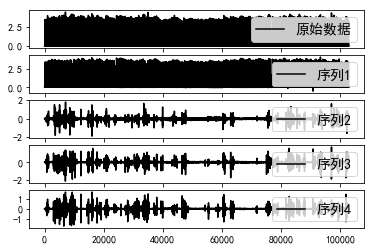

In [30]:
from pylab import *
plt.rcParams['font.sans-serif'] = ['SimHei']  #SimHei黑体
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 4))
plt.subplot(5,1,1)
plt.plot(data,'black',label='原始数据')
# plt.title('光伏发电功率序列',fontsize="16")
# plt.ylabel('功率(kW)',fontsize="14")
# plt.xlabel('Time')
# x_labels=ax.set_xticklabels()
plt.legend(loc=1,fontsize="14")

plt.subplot(5,1,2)
# plt.xtiks([1,3,6,9,12])
plt.plot(A3,'black',label='序列1')

# plt.title('Year')
# plt.ylabel('功率(kW)',fontsize="14")
plt.legend(loc=1,fontsize="14")
# plt.xlim((1, 12))


# plt.xlabel('Time')

plt.subplot(5,1,3)
plt.plot(D3,'black',label='序列2')
# plt.title('Month')
# plt.ylabel('功率(千瓦)',fontsize="14")
plt.legend(loc=1,fontsize="14")
# plt.xlabel('Time')

plt.subplot(5,1,4)
plt.plot( D2,'black',label='序列3')
# plt.title('Day')
# plt.ylabel('功率(kW)',fontsize="14")
plt.legend(loc=1,fontsize="14")
# plt.xlabel('Time')

plt.subplot(5,1,5)
plt.plot( D1,'black',label='序列4')
# plt.title('Day')
# plt.ylabel('功率(kW)',fontsize="14")
# plt.xlabel('时间序列',fontsize="14")
plt.legend(loc=1,fontsize="14")
# plt.legend()
plt.savefig('../picture/小波分解重构0729.jpg',dpi=300)
plt.savefig('../picture/小波分解重构0729.svg',format="svg",dpi=300)

In [26]:
# traday=tra.loc[(tra['Year'] ==2019) & (tra['Month'] == 3) & (tra['Day'] == 5),:]
data = traday['1A Trina_power'].values

NameError: name 'traday' is not defined

In [ ]:
type(data)

In [ ]:
data

In [ ]:
pywt.wavelist(family = None, kind = 'all')

In [ ]:
w = pywt.Wavelet('db3')
cA, cD = pywt.dwt(data, wavelet=w, mode='symmetric')
 

In [ ]:
cA

In [ ]:
cD

In [ ]:
plt.plot(cA,'b',label='Power')
plt.title('Day')
plt.ylabel('Power(kW)')
plt.xlabel('Time')
plt.legend()

In [ ]:
plt.plot(cD,'b',label='Power')
plt.title('Day')
plt.ylabel('Power(kW)')
plt.xlabel('Time')
plt.legend()

In [ ]:
#小波包 wavelet packets 
# X  = [1, 2, 3, 4, 5, 6, 7, 8]
wp = pywt.WaveletPacket(data, wavelet='db3', mode='symmetric', maxlevel=3)
print(wp)
print(wp.data)  #[1 2 3 4 5 6 7 8 9]
print(repr(wp.path))
print(wp.level) # 0    #分解级别为0 
print(wp['ad'].maxlevel)    # 3 

In [ ]:
#访问小波包的子节点
#第一层：
print(wp['a'].data)

In [ ]:
plt.plot(wp['a'].data,'b',label='Power')
plt.title('Day')
plt.ylabel('Power(kW)')
plt.xlabel('Time')
plt.legend()

In [ ]:
type(wp)

In [ ]:
print(wp['d'].data)

In [ ]:
plt.plot(wp['d'].data,'b',label='Power')
plt.title('Day')
plt.ylabel('Power(kW)')
plt.xlabel('Time')
plt.legend()

In [ ]:
plt.plot(data,'b',label='Power')
plt.title('Day')
plt.ylabel('Power(kW)')
plt.xlabel('Time')
plt.legend()

In [ ]:
tramonth=tra.loc[(tra['Year'] ==2019) & (tra['Month'] == 3),:]
trayear = tra.loc[(tra['Year'] ==2019),:]

In [ ]:
tra2019 = tra.loc[tra['Year'] ==2019,:]

In [ ]:
plt.figure(figsize=(9, 14))
plt.subplot(3,1,1)
# plt.xticks([1,3,6,9,12])
plt.plot(tra.loc[(tra['Year'] ==2019),:]['1A Trina_power'],'b',label='Power')

plt.title('Year')
plt.ylabel('Power(kW)')
# plt.xlim((1, 12))


# plt.xlabel('Time')

plt.subplot(3,1,2)
plt.plot(tra.loc[(tra['Year'] ==2019) & (tra['Month'] == 3),:]['1A Trina_power'],'b',label='Power')
plt.title('Month')
plt.ylabel('Power(kW)')
# plt.xlabel('Time')

plt.subplot(3,1,3)
plt.plot(tra.loc[(tra['Year'] ==2019) & (tra['Month'] == 3) & (tra['Day'] == 5),:]['1A Trina_power'],'b',label='Power')
plt.title('Day')
plt.ylabel('Power(kW)')
plt.xlabel('Time')
plt.legend()
# plt.legend()

In [ ]:
traday=tra.loc[(tra['Year'] ==2019) & (tra['Month'] == 3) & (tra['Day'] == 5),:]

In [ ]:
traday.shape

In [ ]:
traday.head(10)